<a href="https://colab.research.google.com/github/bytexlML/classroom_codes/blob/main/eda_houseprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

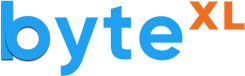

**Exploratory Data Analysis of Titanic Survival Dataset**

**Importing Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
titanic_df = pd.read_csv("Titanic-Dataset.csv")

**Basic Analysis on Dataset**

In [ ]:
print(titanic_df.head())  # Display the first few rows
print(titanic_df.info())  # Get information about the dataset (data types, missing values)
print(titanic_df.describe())  # Get summary statistics for numerical columns

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

Survival rate is a measure of the proportion of individuals in a population who survive a particular event or condition. It is typically expressed as a percentage.
Survival rate can be used to assess the effectiveness of treatments, interventions, or other factors that may influence survival outcomes.

In [ ]:
print(f"Overall survival rate: {titanic_df['Survived'].mean() * 100:.2f}%")

Overall survival rate: 38.38%


**Survival Rate by Gender:**

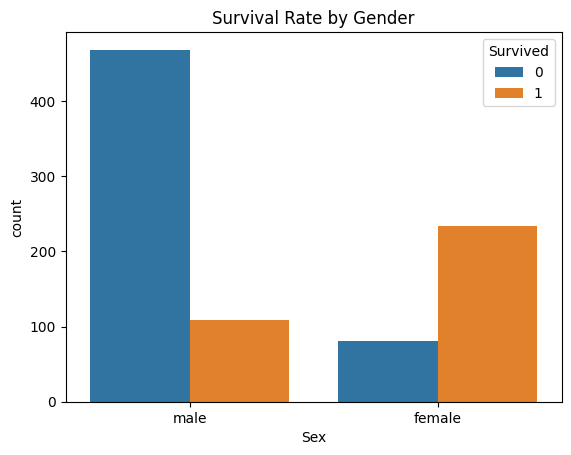

In [ ]:
sns.countplot(x='Sex', hue='Survived', data=titanic_df)
plt.title('Survival Rate by Gender')
plt.show()

**Survival Rate by Class**

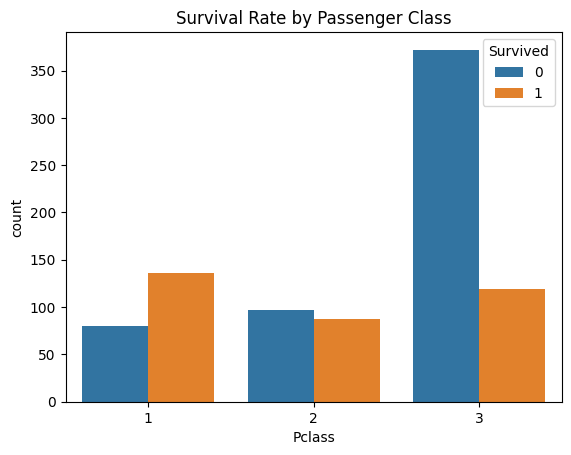

In [ ]:
sns.countplot(x='Pclass', hue='Survived', data=titanic_df)
plt.title('Survival Rate by Passenger Class')
plt.show()

**Survival Rate by Age:**

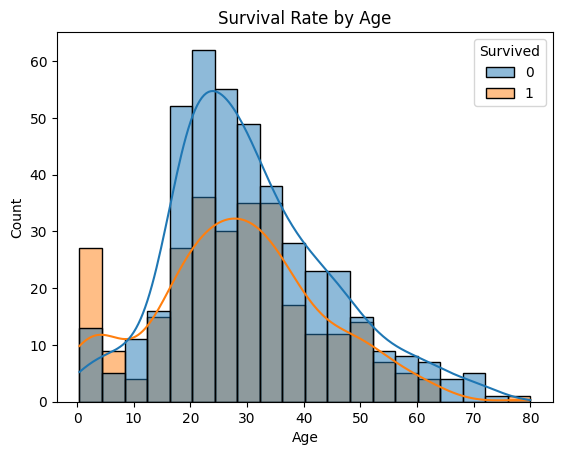

In [ ]:
sns.histplot(x='Age', hue='Survived', data=titanic_df, kde=True)
plt.title('Survival Rate by Age')
plt.show()

**Passenger Demographics**

**Passenger Age wise distribution**

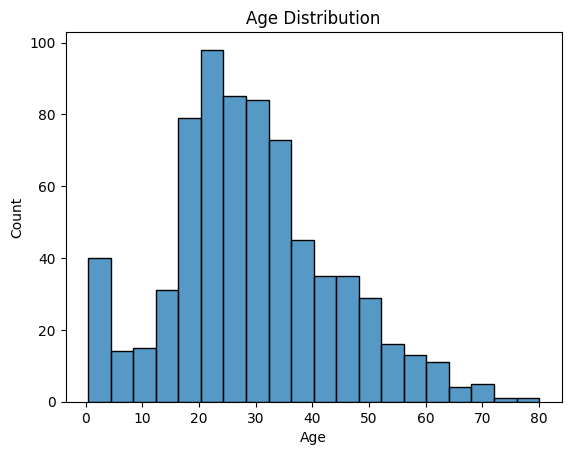

In [ ]:
sns.histplot(x='Age', data=titanic_df)
plt.title('Age Distribution')
plt.show()

**Gender Distribution**

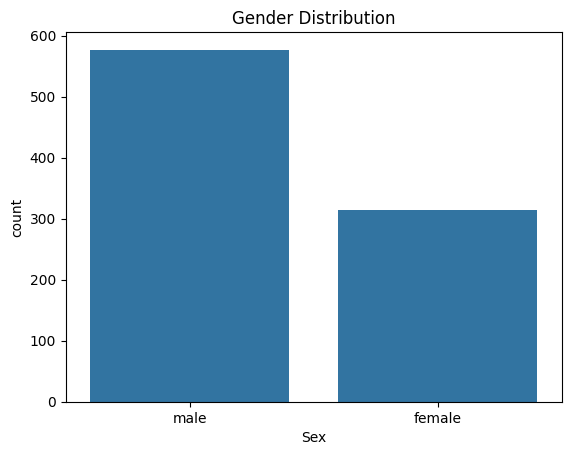

In [ ]:
sns.countplot(x='Sex', data=titanic_df)
plt.title('Gender Distribution')
plt.show()

**Passenger Class Distribution:**

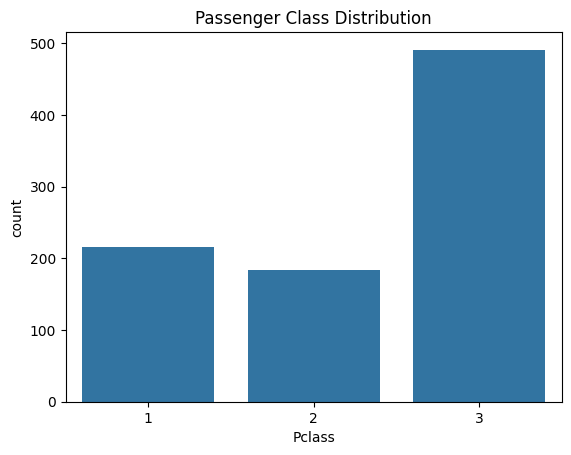

In [ ]:
sns.countplot(x='Pclass', data=titanic_df)
plt.title('Passenger Class Distribution')
plt.show()

**Embarkation Port Distribution:**

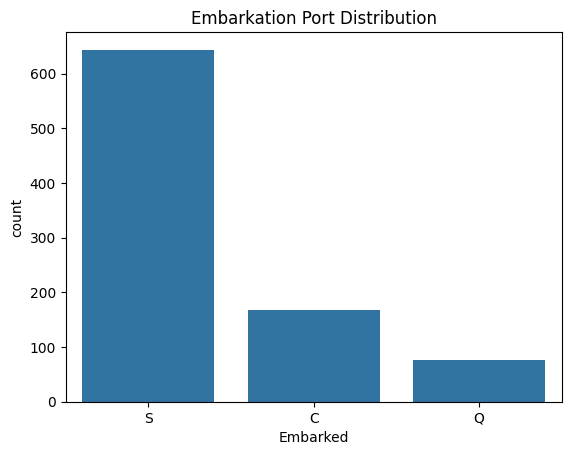

In [ ]:
sns.countplot(x='Embarked', data=titanic_df)
plt.title('Embarkation Port Distribution')
plt.show()

**Correlations**

**Correlations Matrix**

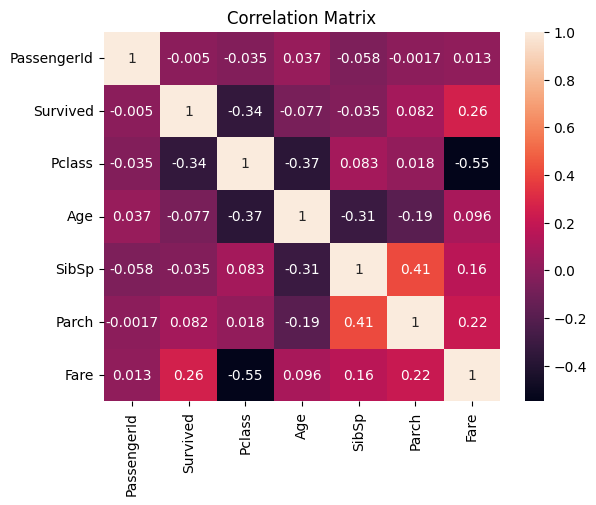

In [ ]:
import numpy as np
titanic_df_numeric = titanic_df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = titanic_df_numeric.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

**Insights from Exploratory data Analysis**

From the analysis, we can observe the following:
Women and Children First: The survival rate for women is significantly higher than men, likely due to the "women and children first" policy implemented during the evacuation.
Class Matters: First-class passengers had a higher survival rate than second and third-class passengers. This suggests the privileged access to lifeboats for higher classes.
Age Impact: Younger children had a higher survival rate, likely due to the prioritization during evacuation.
Fare and Survival: There seems to be a positive correlation between fare and survival, indicating higher-fare passengers likely had access to better accommodations and therefore better survival chances.

**Summary**

The Titanic dataset provides valuable insights into the tragic event and the factors that influenced passenger survival. The analysis reveals the impact of social class, gender, age, and other variables on survival rates. This information helps understand the social dynamics and inequalities prevalent during the disaster.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# 1. Missing Data Analysis
print("Missing Values:")
print(titanic_df.isnull().sum())

Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
# Handling Missing Values (Example: Imputing Age with Median)
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

In [ ]:
# 2. Feature Engineering
# Create new features: Family Size and Title
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1
titanic_df['Title'] = titanic_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [ ]:
# 3. Machine Learning: Predicting Survival
# Data Preparation
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'Title']
X = pd.get_dummies(titanic_df[features], drop_first=True)
y = titanic_df['Survived']

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Model Building (Logistic Regression)
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.80


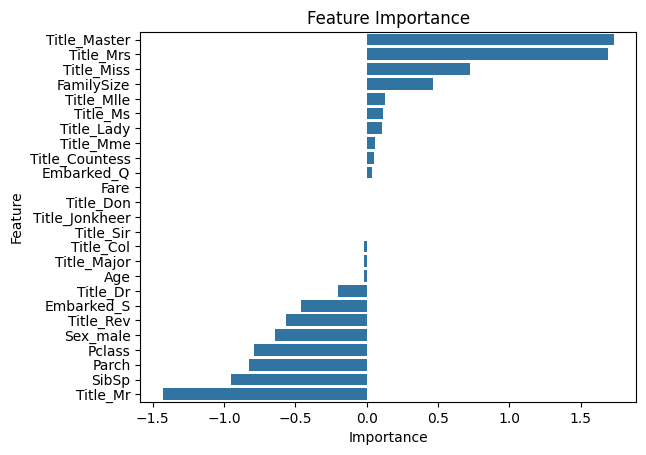

In [ ]:
# Visualization (Example: Feature Importance)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.coef_[0]})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()